Лабораторная работа $№3$
--
Киреев Дмитрий А-05-20
--
**Вариант $13$**

Задача 3.1.  Реализовать решение СЛАУ с помощью LU разложения и LU разложения по схеме частичного выбора. Решить систему небольшой размерности с возмущенной матрицей обоими методами, оценить погрешность и сравнить с теоретической оценкой. Проанализировать поведение  методов с ростом числа уравнений.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Реализуем функцию создания матрицы $А$

In [2]:
def MatBorn(n, m):
    A = [ [0]*m for i in range(n) ]
    for i in range(n):
        for j in range(m):
            A[i][j] = 1/(70 - 3*i - j) 
    A[0][0] += 0.001
    return A

Реализуем функцию создания вектора $B$

In [3]:
def BBorn(A, n, m):
    B = [0] * n
    for i in range(n):
        for j in range(m):
            B[i] = B[i] + A[i][j] * 13
    return B

Реализуем функцию изменения матрицы $А$ (приводим ее к разложению $LU$) и решения нашей системы $Ax = B$

In [4]:
def LUmod(A, B, n, m):
    y = [0] * n
    x = [0] * n
    for k in range(n - 1):
        for i in range(k + 1, n):
            mu = A[i][k]/A[k][k]
            for j in range(k, m):
                A[i][j] = A[i][j] - mu*A[k][j]
            A[i][k] = mu
    for i in range(n):
        y[i] = B[i]
        for j in range(i):
            y[i] = y[i] - y[j] * A[i][j]
    for i in range(n - 1, -1 , -1):
        x[i] = y[i]/A[i][i]
        for j in range(m - 1, i, -1):
            x[i] = x[i] - (x[j] * A[i][j] / A[i][i])
    return x

Заносим ответ в вектор $X1$

In [5]:
A = MatBorn(5, 5)
B = BBorn(A, 5, 5)
X1 = LUmod(A, B, 5, 5)

Решаем тестовый пример. Ответом данной СЛАУ является вектор $[0, 1, 1]$

In [6]:
A = [[1, 3, -4], [2, 4, 2], [5, 2, 0]]
B = [-1, 6, 2]
LUmod(A, B, 3, 3)

[0.0, 1.0, 1.0]

Как мы видим, решение найдено верно!

Реализуем функцию создания матриц $L$ и $U$ из матрицы $A$ (с частичным выбором)

In [7]:
def LUonly(A, B, n, m):
    U = A
    BufRow = [0] * m
    BufB = 0
    L = [ [0]*m for i in range(n) ]
    for j in range(m):
        MaxEl = U[0][j]
        MaxInd = 0
        for i in range(j, n):
            if MaxEl < U[i][j]:
                MaxEl = U[i][j]
                MaxInd = i
        BufRow = U[j]
        U[j] = U[i]
        U[i] = BufRow
        BBuf = B[j]
        B[j] = B[i]
        B[i] = BBuf
    for i in range(n):
        for j in range(m):
            if (U[i][j] != 0) and (i > j):
                mu = U[i][j]/A[j][j]
                L[i][j] = mu
                for k in range(j, m):
                    U[i][k] = U[i][k] - U[j][k]*mu
    for i in range(n):
        L[i][i] = 1
    return L, U

Реализуем функцию решения нашей СЛАУ

In [8]:
def Worker(L, U, n, m, B):
    y = [0] * n
    x = [0] * n
    for i in range(n):
        y[i] = B[i]
        for j in range(i):
            y[i] = y[i] - y[j] * L[i][j]
    for i in range(n - 1, -1 , -1):
        x[i] = y[i]/U[i][i]
        for j in range(m - 1, i, -1):
            x[i] = x[i] - (x[j] * U[i][j] / U[i][i])
    return x

Проверяем работа способность этой реализации на том же примере

In [9]:
A = [[1, 3, -4], [2, 4, 2], [5, 2, 0]]
B = [-1, 6, 2]
L, U = LUonly(A, B, 3, 3)
X2 = Worker(L, U, 3, 3, B)
print(X2)

[5.551115123125783e-17, 0.9999999999999999, 1.0]


Как мы видим, не смотря на небольшую погрешность, решение найдено довольно точно!

In [10]:
A = MatBorn(5, 5)
B = BBorn(A, 5, 5)
L, U = LUonly(A, B, 5, 5)
X2 = Worker(L, U, 5, 5, B)

Записываем результат в вектор $X2$

In [11]:
print(X1, X2)

[13.000000000000348, 12.999998737179393, 13.000003605261245, 12.999996571950568, 13.000001085575377] [12.999999999999888, 12.999999674752658, 13.000000928439597, 12.999999117316008, 13.000000279483313]


Как мы видим, решения данных СЛАУ, тоже найденны довольно точно, так как решением является вектор $[13, 13, 13, 13, 13]$

Реализуем функцию рпсчета абсолютной погрешности вектора $X$ по норме от бескнечности (все дальнецшие расчеты норм будут проходить по бесконечности)

In [12]:
def AbsPogrChekInf(X, n, ans):
    Buf = [0] * n
    for i in range(n):
        Buf[i] = abs(X[i] - ans)
    return max(Buf)

Расчитываем абсолютную погрешность векоторов $X1$ и $X2$

In [13]:
AbsX1 = AbsPogrChekInf(X1, 5, 13)
AbsX2 = AbsPogrChekInf(X2, 5, 13)
print(AbsX1)
print(AbsX2)

3.6052612450987453e-06
9.284395972031234e-07


Растчитываем относительну погрешность по определению

In [14]:
OtnX1 = AbsX1/13
OtnX2 = AbsX2/13
print(OtnX1)
print(OtnX2)

2.773277880845189e-07
7.141843055408641e-08


Реализуем функцию для расчета числа обусловленности

In [15]:
AbsA = 0.001
def CondInf(A, n, m):
    Buf = [0] * n
    Buf_inf = [0] * n
    A_inv = np.linalg.inv(A)
    for i in range(n):
        for j in range(m):
            Buf[i] = Buf[i] + abs(A[i][j])
            Buf_inf[i] = Buf_inf[i] + abs(A_inv[i][j])
    return (max(Buf) * max(Buf_inf))

In [16]:
A = MatBorn(5, 5)
OCENKA = CondInf(A, 5, 5) * AbsA
print(OCENKA)

6323372.209616824


Не смотря на, мягко скажем, колоссальное знаение числа обусловленности, погрешность самого решения получилась очень даже малой:

$3*10^-7$ для первго решения

$7*10^-8$ для второго решения

(Согласно лекций, и при таком значении числа обусловленности можно получить корректное решение)

Составляем массивы, который содержат значение относительных погрешностей для матриц порядка от $5$ до $15$

In [17]:
Pogr1 = [0] * 11 
for i in range(5, 16):
    A = MatBorn(i, i)
    B = BBorn(A, i, i)
    X1 = LUmod(A, B, i, i)
    AbsX1 = AbsPogrChekInf(X1, i, 13)
    OtnX1 = AbsX1/13
    Pogr1[i - 5] = OtnX1

Pogr2 = [0] * 11
for i in range(5, 16):
    A = MatBorn(i, i)
    B = BBorn(A, i, i)
    L, U = LUonly(A, B, i, i)
    X2 = Worker(L, U, i, i, B)
    AbsX2 = AbsPogrChekInf(X2, i, 13)
    OtnX2 = AbsX2/13
    Pogr2[i - 5] = OtnX2
print(Pogr1, Pogr2)

[2.773277880845189e-07, 3.471796754986109e-05, 0.005065052523049255, 0.0355583281745125, 20.547129201655515, 3.4388262638966194, 63.93252786263796, 24.674055579607774, 26.22822885861046, 46.962010519339735, 38.08978921220649] [7.141843055408641e-08, 6.863180649164546e-06, 0.0021647496334700543, 0.2126831114417233, 428.4117955746417, 4.340008763840047, 59.40937652542712, 23.28316830864511, 2.67168190890085, 356.04361706592766, 15.70901973212629]


Строим графики зависимости значения погрешности от порядка матрицы

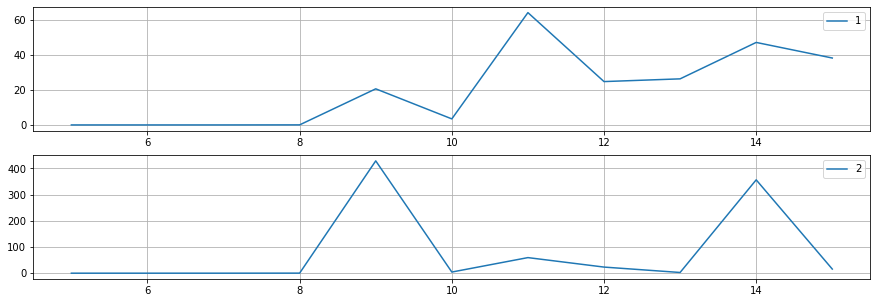

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(15, 5))
axs[0].plot([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], Pogr1, label='1')
axs[1].plot([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], Pogr2, label='2')
axs[0].legend()
axs[0].grid()
axs[1].legend()
axs[1].grid()

**Как мы видим, с увеличением порядка матрицы, значение погрешности увеличивается в разы**

Задача 3.2 Дана система уравнений  Ax=b  порядка n с разреженной матрицей A. Решить систему прямым методом. 

на главной и на 12-ой наддиагонали элементы равны 24, в 12 столбце элементы равны 20. **(Вариант 60)**

Реализуем функцию создания матрицы $A$

In [19]:
def ABorn(n):
    A = [ [0]*n for i in range(n) ]
    for i in range(n):
        A[i][i] = 24
        for j in range(n):
            if (i + 12) == j:
                A[i][j] = 24
            elif j == 12:
                A[i][j] = 20
    return A
A = ABorn(40)
print(A)

[[24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 

Реализуем функцию создания вектора $B$

In [20]:
def BBorn(n):
    B = [0] * n
    for i in range(n):
        B[i] = (i+1)*np.exp(12/(i+1))*np.tan(i+1)
    return B
B = BBorn(40)
print(B)

[253475.5693805541, -1763.015991538251, -23.34833263642643, 93.02184846833975, -186.3200658563093, -12.901566439668363, 33.87227253797901, -243.79354008250968, -15.443418559381593, 21.52633755286384, -7399.160640201118, -20.74135787431248, 15.15065398108862, 238.99854493172677, -28.57572522362055, 10.183015381742546, 120.31565719245965, -39.8733233918108, 5.416439405314684, 81.5274603194257, -56.80262033441161, 0.335996775664813, 61.5472458242332, -84.47639031074952, -5.394715210107338, 48.62280063477696, -137.85512502651247, -12.096340918925893, 38.91343895107391, -286.6689382718708, -20.165023310965722, 30.77625969182841, -3575.273244675033, -30.17137187332529, 23.365633417146377, 389.3995258654308, -43.026086294619056, 16.170539863517266, 191.7557716420803, -60.32329657852148]


**Решение системы данного типа:**

1) Уравнения номера которых кратны 12 (12, 24, 36) образуют систему из трех уравнений и трех неизвестных. Из этой системы мы находим значение $X[12]$ - элемента, который располагается в столбце матрицы.

2) Затем мы находим значения остальных элементов вектора $X$. Последний 12 уравнений (и первое уравнение) состаят из двух переменных. Так как одна из переменных это $X[12]$, то достаточно просто выразить вторую переменную. Решаем эти уравнения в первую очередь (шагаем снизу вверх по строка матрицы). Остальные уравнения содержат три переменные. В каждом из них, 2 уже найдены. Следовательно достаточно выразить третью.

Уравнение для уравнений с двумя переменными: $X[i] = (B[i] - (X[12] * A[i][12]))/A[i][i]$

Уравнение для уравнений с тремя переменными: $X[i] = (B[i] - (X[12] * A[i][12]) - (X[i + 12] * A[i][i + 12])) / A[i][i]$

In [21]:
n = 40
M = n // 12
n, M

(40, 3)

Находим кол-во уравнений для поиска элемента $X[12]$. Их 3.

In [22]:
X12Finder = [[0]*M for i in range(M)]
B12 = [0] * M
for i in range(M):
    B12[i] = B[(i + 1)*12]
    for j in range(M):
        X12Finder[i][j] = A[(i + 1)*12][(j + 1)*12]
print(X12Finder, '\n'*2,B12)

[[20, 24, 0], [20, 24, 24], [20, 0, 24]] 

 [15.15065398108862, -5.394715210107338, -43.026086294619056]


Составляем СЛАУ для нахождения элемента $X[12]$

In [23]:
BB = 0
for i in range(M):
    BB = BB + B12[i] * ((-1)**(i))
X12 = BB/X12Finder[0][0]
print("X[12]: ", X12)

X[12]:  -1.124035855171155


$X[12]$ найден

Решаем изначальную СЛАУ с помощью наших формул

In [24]:
X = [0]*n
X[12] = X12
for i in range(n - 1, -1, -1):
    if i >= (n - 12) or (i == 0):
        X[i] = (B[i] - (X[12] * A[i][12]))/A[i][i]
    elif i != 12:
        X[i] = (B[i] - (X[12] * A[i][12]) - (X[i + 12] * A[i][i + 12])) / A[i][i]
print(X) 

[10562.60609337826, -82.06509482077992, -13.515979336724945, 5.461074531091367, -10.21839862476133, -9.884019342346052, 1.2821469552134042, -11.336000983611827, -146.30972190819085, 0.5624869169707015, -308.95256397936595, 19.81730314188712, -1.124035855171155, 9.542791719328758, 13.479828689516472, -0.6484676322679146, 3.3917590933910726, 10.2831506200025, 1.0658942798450168, 2.114633359483221, 146.60294268085923, 1.2711403603745877, 1.5909005169619508, -19.74482984067418, 1.567973795187988, 1.3521775321358203, -13.733787361191366, 2.0094564858164827, 2.558089835604042, -11.00784254868532, 0.09648724135239058, 2.219040699802146, -148.03302198215042, -0.3204439487459247, 1.910264605023728, 17.16167679036891, -0.856057049633165, 1.610469040289182, 8.926520364395975, -1.576774144795766]


Предоставляю тестовый пример. Система $Ax = B$, где $B$ есть решения системы, в которой $X[i] = N$. $N = 13$. Матрица $A$ - остается без изменений

Составляем вектор $B$

In [25]:
B = BBorn(40)
print(B)

[253475.5693805541, -1763.015991538251, -23.34833263642643, 93.02184846833975, -186.3200658563093, -12.901566439668363, 33.87227253797901, -243.79354008250968, -15.443418559381593, 21.52633755286384, -7399.160640201118, -20.74135787431248, 15.15065398108862, 238.99854493172677, -28.57572522362055, 10.183015381742546, 120.31565719245965, -39.8733233918108, 5.416439405314684, 81.5274603194257, -56.80262033441161, 0.335996775664813, 61.5472458242332, -84.47639031074952, -5.394715210107338, 48.62280063477696, -137.85512502651247, -12.096340918925893, 38.91343895107391, -286.6689382718708, -20.165023310965722, 30.77625969182841, -3575.273244675033, -30.17137187332529, 23.365633417146377, 389.3995258654308, -43.026086294619056, 16.170539863517266, 191.7557716420803, -60.32329657852148]


Составляем СЛАУ для поиска $X[12]$

In [26]:
X12Finder = [[0]*M for i in range(M)]
B12 = [0] * M
for i in range(M):
    B12[i] = B[(i + 1)*12]
    for j in range(M):
        X12Finder[i][j] = A[(i + 1)*12][(j + 1)*12]
print(X12Finder,'\n'*2, B12)

[[20, 24, 0], [20, 24, 24], [20, 0, 24]] 

 [15.15065398108862, -5.394715210107338, -43.026086294619056]


$X[12]$ найдено

In [27]:
BB = 0
for i in range(M):
    BB = BB + B12[i] * ((-1)**(i))
X12 = BB/X12Finder[0][0]
print("X[12]: ", X12)

X[12]:  -1.124035855171155


Решаем тестовй пример согласно выведенным формулам

In [28]:
X = [0]*n
X[12] = X12
for i in range(n - 1, -1, -1):
    if i >= (n - 12) or (i == 0):
        X[i] = (B[i] - (X[12] * A[i][12]))/A[i][i]
    elif i != 12:
        X[i] = (B[i] - (X[12] * A[i][12]) - (X[i + 12] * A[i][i + 12])) / A[i][i]
print(X) 

[10562.60609337826, -82.06509482077992, -13.515979336724945, 5.461074531091367, -10.21839862476133, -9.884019342346052, 1.2821469552134042, -11.336000983611827, -146.30972190819085, 0.5624869169707015, -308.95256397936595, 19.81730314188712, -1.124035855171155, 9.542791719328758, 13.479828689516472, -0.6484676322679146, 3.3917590933910726, 10.2831506200025, 1.0658942798450168, 2.114633359483221, 146.60294268085923, 1.2711403603745877, 1.5909005169619508, -19.74482984067418, 1.567973795187988, 1.3521775321358203, -13.733787361191366, 2.0094564858164827, 2.558089835604042, -11.00784254868532, 0.09648724135239058, 2.219040699802146, -148.03302198215042, -0.3204439487459247, 1.910264605023728, 17.16167679036891, -0.856057049633165, 1.610469040289182, 8.926520364395975, -1.576774144795766]


**Как мы видим, все элементы вектора $X$ найдены корректно**

Задача 3.3.Решить задачу итерационным методом, указанным в  индивидуальном варианте.

Реализуем функцию создания матрицы $A$

In [29]:
m = 18
beta = (abs(66 - 13) + 5) * m
def ABorn(m, beta):
    A = [ [0]*m for i in range(m) ]
    for i in range(m):
        for j in range(m):
            A[i][j] = (np.cos(i + j) / 0.1 * beta) + 0.1 * beta * np.exp(-1 * (i - j)**2)
    return A
print(ABorn(m, beta))

[[10544.4, 5679.162686921678, -4342.660820852182, -10335.508780525102, -6824.039390067436, 2961.4332162375317, 10024.17779262982, 7870.7395353441, -1519.0203529619253, -9512.199934076027, -8759.906763558163, 46.20428699525019, 8809.835329167217, 9473.744398340048, 1427.5365580897828, -7931.141810246094, -9997.964974576134, -2872.7052492586718], [5679.162686921678, -4240.172973552167, -10297.11505085035, -6822.127249116124, 2961.4461002196285, 10024.177804378493, 7870.7395353455495, -1519.0203529619253, -9512.199934076027, -8759.906763558163, 46.20428699525019, 8809.835329167217, 9473.744398340048, 1427.5365580897828, -7931.141810246094, -9997.964974576134, -2872.7052492586718, 6893.706434068197], [-4342.660820852182, -10297.11505085035, -6719.639401816109, 2999.8398298943807, 10026.089945329804, 7870.752419327647, -1519.020341213253, -9512.199934074577, -8759.906763558163, 46.20428699525019, 8809.835329167217, 9473.744398340048, 1427.5365580897828, -7931.141810246094, -9997.96497457613

Реализуем функцию для создания матриц коэффициентов $B1$ и $B2$ необходимы для решения СЛАУ **методом Зейделя**

In [30]:
def BMatBorn(A, m):
    B1 = [ [0]*m for i in range(m) ]
    B2 = [ [0]*m for i in range(m) ]
    for i in range(m):
        for j in range(m):
            if i > j:
                B1[i][j] = -1 * A[i][j] / A[i][i]
            elif i < j:
                B2[i][j] = -1 * A[i][j] / A[i][i]
    return B1, B2

Расчитываем матрицы $А$, $В1$, $В2$ и $В0$, как сумму матриц $В1$ и $В2$

In [31]:
A = ABorn(m, beta)
B1, B2 = BMatBorn(A, 18)
B0 = [ [0]*m for i in range(m) ]
for i in range(m):
    for j in range(m):
        B0[i][j] = B1[i][j] + B2[i][j]

Реализуем функцию для расчета нормы матрицы (по бесконечности), для проверки критерия сходимости **метода Зейделя**

In [32]:
def ModulInf(B, m):
    Buf = [0] * m
    for i in range(m):
        for j in range(m):
            Buf[i] = Buf[i] + abs(B[i][j])
    return max(Buf)

Как мы видим, критерий сходимости не выполняется (сумма норм больше $1$). **Следовательно метод не сходится**. 

Давайте в этом убедимся

In [33]:
print(ModulInf(B1, m) + ModulInf(B2, m))

122.83077776780272


Расчитываем вектор $B$ с помощью той же функции, что и в задаче $3.1$

In [34]:
B = BBorn(m)
print(B)

[253475.5693805541, -1763.015991538251, -23.34833263642643, 93.02184846833975, -186.3200658563093, -12.901566439668363, 33.87227253797901, -243.79354008250968, -15.443418559381593, 21.52633755286384, -7399.160640201118, -20.74135787431248, 15.15065398108862, 238.99854493172677, -28.57572522362055, 10.183015381742546, 120.31565719245965, -39.8733233918108]


Реализуем функцию для решения системы с помощью **метода Зейделя**

In [35]:
def Solve(B1, B2, eps, B, m, indend):
    X0 = [0] * m
    X1 = [0] * m
    XX = [0] * m
    index = 0
    for i in range(m):
        X1[i] = X1[i] + B[i] / A[i][i]
        for j in range(m):
            if i > j:
                X1[i] = X1[i] + B1[i][j]*X1[j]
            elif j > i:
                X1[i] = X1[i] + B2[i][j]*X1[j]
    for i in range(m):
        XX[i] = abs(X1[i] - X0[i])
    index += 1
    while (((max(XX)) > (((1 - ModulInf(B0, m))/ModulInf(B2, m)) * eps)) and (index < indend)):
        X0 = X1
        for i in range(m):
            X1[i] = X1[i] + B[i] / A[i][i]
            for j in range(m):
                if i > j:
                    X1[i] = X1[i] + B1[i][j]*X1[j]
                elif j > i:
                    X1[i] = X1[i] + B2[i][j]*X1[j]
        for i in range(m):
            XX[i] = abs(X1[i] - X0[i])
        index += 1
    return X1

Задаем матрицы $B1$, $B2$, $B$, точность, размерность и максимальное кол-во итераций

In [36]:
print(Solve(B1, B2, 0.001, B, 18, 1))

print(Solve(B1, B2, 0.001, B, 18, 3))

print(Solve(B1, B2, 0.001, B, 18, 10))

print(Solve(B1, B2, 0.001, B, 18, 50))

[24.038880294806162, 32.61275633322389, -65.50748233162035, 65.9073190906769, -143.35175967588037, 131.7798915162446, -138.74785752293465, -13.369782860795226, 12.422417290837327, -13.166858994569493, 6.724178080617769, -7.579257750149864, 7.817264112039828, -6.186799232389586, 6.535582576265462, -11.100875902041619, 9.727600613051333, -10.732019009807942]
[173.28308047870158, 371.7363874962725, -1068.5871559105503, 1123.1681584182616, -2091.0946244072093, 2427.457791087389, -2399.24710082334, 377.11977486768785, 480.93013834449755, -470.32226488471576, 302.98924812050456, -268.4436172138337, 302.72651686212976, -250.09077604708017, 247.32572688540543, -378.30383216265443, 371.35028248673586, -392.73761199353936]
[144122.8449890375, 106276.87854686817, -758385.1696501381, 1046496.1351392013, 255315.26156196566, -766366.689212687, 988770.7508239354, -986192.892284954, 2127398.1905321977, -1492990.2024897954, -99429.41431806146, 927707.6539302947, -640835.1044744725, 297339.20387539366, 

Как мы можем заметить, с увеличением максимального числа итераций, наше решение нисколько не приближается к заветному вектору $[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]$. 

**Наш метод действительно не сходится**